In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('../data/Global_Mobility_Report.csv')
df_pp = pd.read_csv('../data/pp-2020.csv', header=None)
covid = pd.read_csv('../data/phe_cases_london_boroughs.csv')
admin = gpd.read_file('../data/ESRI/London_Borough_Excluding_MHW.shp')
income = pd.read_excel('../data/gla-household-income-estimates.xlsx', sheet_name="Boroughs", header = 2)
ethnicity = pd.read_excel('../data/ethnic-groups-by-borough.xls', sheet_name="2018", header = 1)

## 1) Explore trends

In [143]:
covid_day_gl = covid[['date', 'new_cases', 'total_cases']] #.groupby('date').sum().reset_index()
covid_day_gl['days_since_first_case'] = range(len(covid_day_gl))

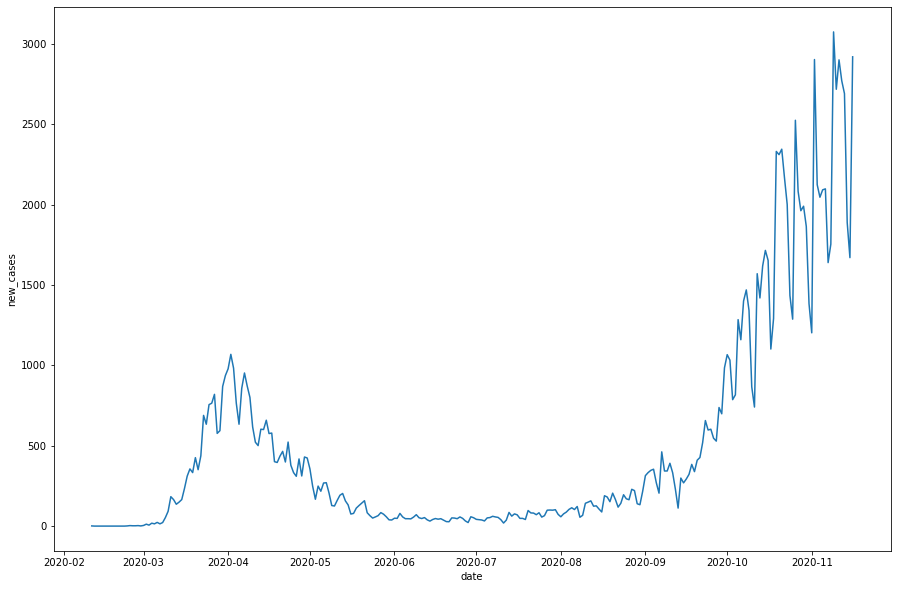

In [41]:
covid_day_gl['date'] = pd.to_datetime(covid_day_gl['date'])
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(data=covid_day_gl.groupby('date').agg({"new_cases": "sum", "total_cases": "max"}).reset_index().iloc[:-2,:], x="date", y="new_cases", ax=ax)
# sns.barplot(data=covid_day_gl, x="days_since_first_case", y = 'new_cases', ax=ax)
# sns.barplot(data=covid_day_gl, x="date", y="new_cases", ax=ax)

In [40]:
covid_day_gl.groupby('date').agg({"new_cases": "sum", "total_cases": "max"}).reset_index().iloc[:-2,:].to_csv('../data/london_covid_time.csv')

In [37]:
# df[df['country_region'] == "Italy"].sub_region_2.unique()

In [31]:
# df[df['sub_region_1']== "South Holland"].sub_region_2.unique()

In [32]:
# df[df['sub_region_1']== "South Holland"].sub_region_2.unique()

In [144]:
# make datetime + drop day of week
df['date'] = pd.to_datetime(df['date'])
df = df[df.date.dt.dayofweek < 5]
# make dfs for cities of interest
df_gl = df[df['sub_region_1']=='Greater London']
df_gl = df_gl.dropna(subset=['sub_region_2'])

df_nyc = df[df['sub_region_2'].isin(['Bronx County', 'Queens County', 'New York County', 'Rockland County', 'Westchester County', 'Dutchess County'])]

df_ps = df[df['sub_region_2'].isin(['Paris'])]
df_ps['city'] = 'Paris'

df_ml = df[df['sub_region_2'].isin(['Metropolitan City of Milan'])]
df_ml['city'] = 'Milan'

df_se = df[df['metro_area'].isin(['Seoul Metropolitan Area'])]
df_se['city'] = 'Seoul'

df_hk = df[df['country_region'].isin(['Hong Kong'])]
df_hk['city'] = 'Hong Kong'

df_ak = df[df['sub_region_1'].isin(['Auckland'])]
df_ak['city'] = 'Auckland'

In [145]:
df_gl_c = df_gl.groupby('date').mean().reset_index().drop('census_fips_code', axis=1)
df_gl_c['city'] = 'Greater London'
df_nyc_c = df_nyc.groupby('date').mean().reset_index().drop('census_fips_code', axis=1)
df_nyc_c['city'] = 'New York City'

In [146]:
index = ['date', 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 
       'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline', 'city']

cities = pd.concat([df_gl_c[index], df_nyc_c[index], df_ps[index], df_ml[index], df_se[index], df_hk[index], df_ak[index]]).reset_index().drop('index', axis=1)
cities['tot_mobility'] = (cities['retail_and_recreation_percent_change_from_baseline'] + cities['grocery_and_pharmacy_percent_change_from_baseline'] + cities['transit_stations_percent_change_from_baseline'] + cities['workplaces_percent_change_from_baseline'])/4
cities['date'] = pd.to_datetime(cities['date'])
cities.to_csv('../data/cities_mob.csv')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

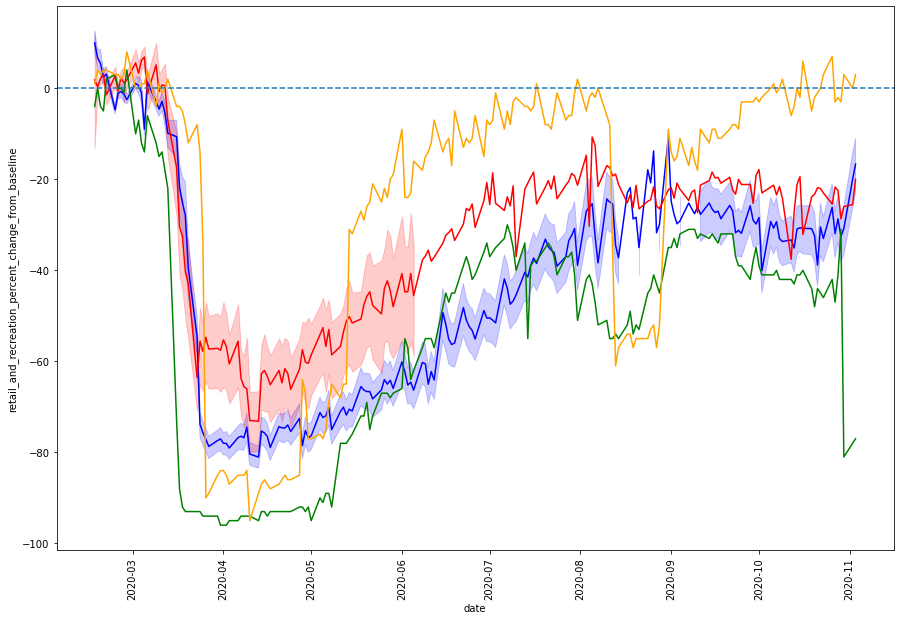

In [83]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(data=df_gl, x="date", y="retail_and_recreation_percent_change_from_baseline", ax=ax, color='blue')
sns.lineplot(data=df_nyc, x="date", y="retail_and_recreation_percent_change_from_baseline", ax=ax, color='red')
sns.lineplot(data=df_ps, x="date", y="retail_and_recreation_percent_change_from_baseline", ax=ax, color='green')
sns.lineplot(data=df_ak, x="date", y="retail_and_recreation_percent_change_from_baseline", ax=ax, color='orange')
# sns.lineplot(data=df_se, x="date", y="retail_and_recreation_percent_change_from_baseline", ax=ax, color='orange')

# sns.lineplot(data=df_se, x="date", y="retail_and_recreation_percent_change_from_baseline", ax=ax)
ax.axhline(0, ls='--')
plt.setp(ax.get_xticklabels(), rotation=90)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

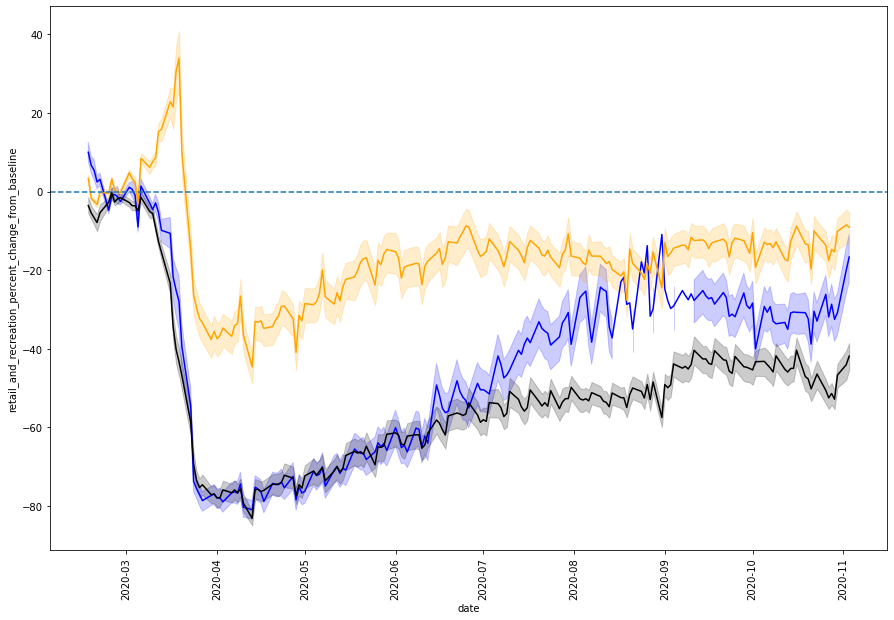

In [14]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(data=df_gl, x="date", y="retail_and_recreation_percent_change_from_baseline", ax=ax, color='blue')
sns.lineplot(data=df_gl, x="date", y="grocery_and_pharmacy_percent_change_from_baseline", ax=ax, color='orange')
sns.lineplot(data=df_gl, x="date", y="transit_stations_percent_change_from_baseline", ax=ax, color='black')
# sns.lineplot(data=df_gl, x="date", y="workplaces_percent_change_from_baseline", ax=ax, color='green')
# sns.lineplot(data=df_gl, x="date", y="residential_percent_change_from_baseline", ax=ax)
ax.axhline(0, ls='--')
plt.setp(ax.get_xticklabels(), rotation=90)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

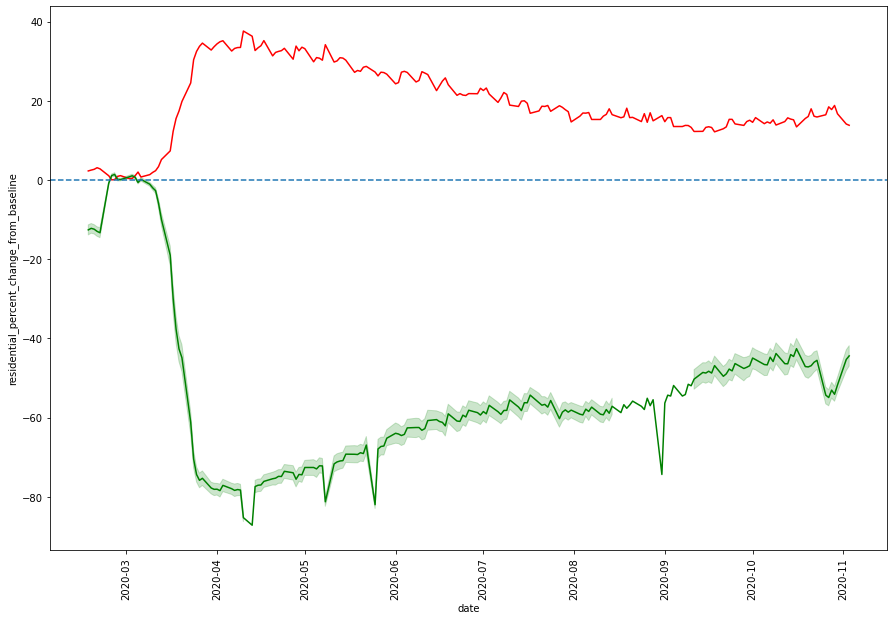

In [13]:
fig, ax = plt.subplots(figsize = (15,10))
# sns.lineplot(data=df_gl, x="date", y="parks_percent_change_from_baseline", ax=ax, color='green')
sns.lineplot(data=df_gl, x="date", y="residential_percent_change_from_baseline", ax=ax, color='red')
sns.lineplot(data=df_gl, x="date", y="workplaces_percent_change_from_baseline", ax=ax, color='green')

ax.axhline(0, ls='--')
plt.setp(ax.get_xticklabels(), rotation=90)

In [35]:
# import plotly.express as px
# fig = px.line(df_gl, x="date", 
#                  y="retail_and_recreation_percent_change_from_baseline", 
#                   height=1200)
# fig.add_trace(px.line(df_nyc, x="date", 
#                  y="retail_and_recreation_percent_change_from_baseline", 
#                  height=1200))
# # fig.add_hline(y=0, line_dash="dot",
# #               annotation_text="pre-COVID19 baseline",
# #               annotation_position="bottom right")

# fig.show()

In [35]:
# fig = px.line(df_gl[df_gl['sub_region_2'].isna()==False], x="date", 
#                  y="retail_and_recreation_percent_change_from_baseline", 
#                  color="sub_region_2")
# fig.show()

In [36]:
# fig = px.line(df_gl[df_gl['sub_region_2'].isna()==False], x="date", 
#                  y="transit_stations_percent_change_from_baseline", 
#                  color="sub_region_2")
# fig.show()

In [37]:
# fig = px.line(df_gl[df_gl['sub_region_2'].isna()==False], x="date", 
#                  y="workplaces_percent_change_from_baseline", 
#                  color="sub_region_2")
# fig.show()

In [38]:
# fig = px.line(df_gl[df_gl['sub_region_2'].isna()==False], x="date", 
#                  y="grocery_and_pharmacy_percent_change_from_baseline", 
#                  color="sub_region_2")
# fig.show()

In [39]:
# import plotly.express as px
# fig = px.line(df_gl[df_gl['sub_region_2'].isna()==False], x="date", 
#                  y="retail_and_recreation_percent_change_from_baseline", 
#                  facet_col="sub_region_2", facet_col_wrap=5, height=1200)

# # fig.add_hline(y=0, line_dash="dot",
# #               annotation_text="pre-COVID19 baseline",
# #               annotation_position="bottom right")

# fig.show()

In [132]:
import plotly.express as px
fig = px.line(df_gl[df_gl['sub_region_2'].isna()==False], x="date", 
                 y="grocery_and_pharmacy_percent_change_from_baseline", 
                 facet_col="sub_region_2", facet_col_wrap=5, height=1200)

# fig.add_hline(y=0, line_dash="dot",
#               annotation_text="pre-COVID19 baseline",
#               annotation_position="bottom right")

fig.show()

In [133]:
import plotly.express as px
fig = px.line(df_gl[df_gl['sub_region_2'].isna()==False], x="date", 
                 y="workplaces_percent_change_from_baseline", 
                 facet_col="sub_region_2", facet_col_wrap=5, height=1200)

# fig.add_hline(y=0, line_dash="dot",
#               annotation_text="pre-COVID19 baseline",
#               annotation_position="bottom right")

fig.show()

In [135]:
import plotly.express as px
fig = px.line(df_gl[df_gl['sub_region_2'].isna()==False], x="date", 
                 y="residential_percent_change_from_baseline", 
                 facet_col="sub_region_2", facet_col_wrap=5, height=1200)

# fig.add_hline(y=0, line_dash="dot",
#               annotation_text="pre-COVID19 baseline",
#               annotation_position="bottom right")

fig.show()

In [137]:
import plotly.express as px
fig = px.line(df_gl[df_gl['sub_region_2'].isna()==False], x="date", 
                 y="transit_stations_percent_change_from_baseline", 
                 facet_col="sub_region_2", facet_col_wrap=5, height=1200)

# fig.add_hline(y=0, line_dash="dot",
#               annotation_text="pre-COVID19 baseline",
#               annotation_position="bottom right")

fig.show()

In [138]:
import plotly.express as px
fig = px.line(df_gl[df_gl['sub_region_2'].isna()==False], x="date", 
                 y="parks_percent_change_from_baseline", 
                 facet_col="sub_region_2", facet_col_wrap=5, height=1200)

# fig.add_hline(y=0, line_dash="dot",
#               annotation_text="pre-COVID19 baseline",
#               annotation_position="bottom right")

fig.show()

## 2) Spatial Analysis

In [149]:
# make data for city of london and total cases per layer
covid_tot = covid.tail(32)[['area_name','total_cases', 'area_code']]
covid_tot = covid_tot.append(pd.DataFrame([['City of London', 104, 'E09000001']], columns=covid_tot.columns)).sort_values('area_code').reset_index().drop('index',axis=1)
covid_tot['area_name'] = covid_tot['area_name'].replace({'Hackney and City of London': 'Hackney'})
covid_tot['total_cases'][covid_tot['area_name']=='Hackney'] = covid_tot['total_cases'][covid_tot['area_name']=='Hackney'].values - covid_tot['total_cases'][covid_tot['area_name']=='City of London'].values

In [150]:
# names must match
admin.NAME = admin.NAME.str.replace('Westminster', 'City of Westminster')
df_gl['sub_region_2'] = df_gl['sub_region_2'].str.replace('London Borough of ', '').str.replace('Royal Borough of ', '')
df_gl['sub_region_2'][df_gl['sub_region_2'] == 'City of Westminster'] = 'Westminster'
# df_gl = pd.merge(admin[['NAME', 'geometry']], df_gl, left_on='NAME', right_on='sub_region_2')

In [152]:
# mobility by borough
df_gl = df_gl.drop(['country_region_code', 'country_region', 'sub_region_1', 'metro_area', 'iso_3166_2_code', 'census_fips_code'], axis = 1)
df_gl = pd.merge(df_gl, covid_tot, left_on='sub_region_2', right_on='area_name').drop('sub_region_2', axis=1)
# df_gl

In [170]:
import numpy as np
from functools import reduce
df_gl['tot_mobility'] = (df_gl['retail_and_recreation_percent_change_from_baseline'] + df_gl['grocery_and_pharmacy_percent_change_from_baseline'] + df_gl['transit_stations_percent_change_from_baseline'] + df_gl['workplaces_percent_change_from_baseline'])/4

In [214]:
income = income.iloc[:33,:][['Code', 'Unnamed: 26']].rename(columns = {"Code": "area_code", "Unnamed: 26":"income"})
ethnicity = ethnicity.iloc[:33,:7].drop("Unnamed: 1", axis=1).rename(columns = {"Unnamed: 0": "area_code"}).replace('-', np.NaN)

In [ ]:
ethnicity['White'] = ethnicity['White']/ethnicity['Total']
ethnicity['Asian'] = ethnicity['Asian']/ethnicity['Total']
ethnicity['Black'] = ethnicity['Black']/ethnicity['Total']
ethnicity['Mixed/ Other'] = ethnicity['Mixed/ Other']/ethnicity['Total']

In [225]:
ethnicity['ethnic_majority'] = ""
ethnicity['ethnic_majority'][ethnicity['White']>0.5] = "White"
ethnicity['ethnic_majority'][ethnicity['White']<0.5] = "Ethnic Minority"
ethnicity['ethnic_majority'][ethnicity['area_code']=="E09000001"] = np.NaN
# income['ethnic_majority'][(income['income']>36000)&(income['income']<43000)] = "Mid Income"
# income['ethnic_majority'][income['income']<=36000] = "Low Income"
# income['ethnic_majority'][income['income']<=36000] = "Low Income"

In [203]:
income['income_status'] = ""
income['income_status'][income['income']>=43000] = "High Income"
income['income_status'][(income['income']>36000)&(income['income']<43000)] = "Mid Income"
income['income_status'][income['income']<=36000] = "Low Income"

In [227]:
dfs = [df_gl, income, ethnicity]
df_gl_demo = reduce(lambda  left, right: pd.merge(left, right, on=['area_code'],
                                            how='inner'), dfs)

In [231]:
df_gl_demo.to_csv('../data/london_mobility_boroughs_demographics.csv')

In [239]:
# df_gl_demo[df_gl_demo['income_status']!="Mid Income"].groupby(['income_status', 'date']).mean().reset_index().to_csv('../data/london_mobility_boroughs_demographics_agg.csv')

In [272]:
df_gl_dMean = df_gl_demo[df_gl_demo['income_status']!="Mid Income"].groupby(['income_status', 'date']).mean().reset_index()
df_gl_dMean['area_code'] = ""
df_gl_dMean['area_code'][df_gl_dMean['income_status']!="High Income"] = "Mean Value HI"
df_gl_dMean['area_code'][df_gl_dMean['income_status']!="Low Income"] = "Mean Value LI"
df_gl_final = pd.concat([df_gl_demo, df_gl_dMean])

In [275]:
df_gl_final.to_csv('../data/london_mobility_boroughs_demographics_agg.csv')

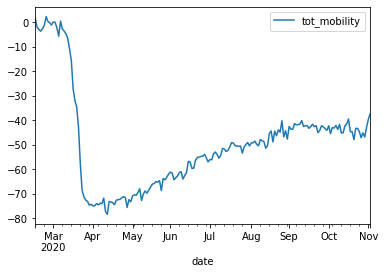

In [274]:
df_gl_final[df_gl_final['area_code'] == "Mean Value LI"][['tot_mobility', 'income_status', 'date']].plot(x='date', y='tot_mobility')

In [76]:
# df_gl.plot(column='retail_and_recreation_percent_change_from_baseline', cmap='Reds_r', edgecolor='white', linewidth=0.2)

In [77]:
# admin.NAME.unique()

In [78]:
# df_gl.sub_region_2.unique()

In [79]:
# df_gl[df_gl['date']=='2020-08-17'].plot(column='retail_and_recreation_percent_change_from_baseline', cmap='Reds_r', edgecolor='white', linewidth=0.2)

In [187]:
# pd.DataFrame('City of London', 'E09000012', 7, 8], columns = covid.columns)
# # covid.area_name['City of London'] = 

In [189]:
# admin[admin['NAME'].isin(['City of London', 'Hackney'])].plot()

In [230]:
# sorted(covid_tot.area_name.unique())

In [224]:
len(sorted(df_gl.area_code.unique()))

33

In [183]:
pd.pivot_table(df_gl[['date', 'area_code', 'tot_mobility']], values='tot_mobility', index=['area_code'],
                    columns=['date']).reset_index().to_csv('../data/london_mobility_boroughs.csv')

In [227]:
# covid_tot.to_csv('../data/london_covid_tot.csv')
df_gl_c.to_csv('../data/london_mobility_boroughs.csv')

In [226]:
df_gl_c = df_gl[['date', 'area_code', 'area_name', 'tot_mobility']].fillna(method = 'ffill')

## 3) Real Estate

In [63]:
df_pp_gl = df_pp[df_pp[13]=='GREATER LONDON']
df_pp_gl.columns = ['ID', 'price_paid', 'date', 'post_code', 'D', 'N', 'F', 'street_n', 'unknown', 'street', 'locality', 'city', 'district', 'county', 'A', 'B']

In [75]:
df_pp_gl['date'] = pd.to_datetime(df_pp_gl['date'])

C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
df_pp_gl['month'] = df_pp_gl['date'].dt.month
df_pp_gl['week'] = df_pp_gl['date'].dt.week

C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [67]:
df_pp_gl.describe()

,price_paid
count,4.090100e+04
mean,7.913121e+05
std,3.034220e+06
min,1.000000e+02
25%,3.400000e+05
50%,4.650000e+05
75%,6.910000e+05
max,2.409635e+08


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

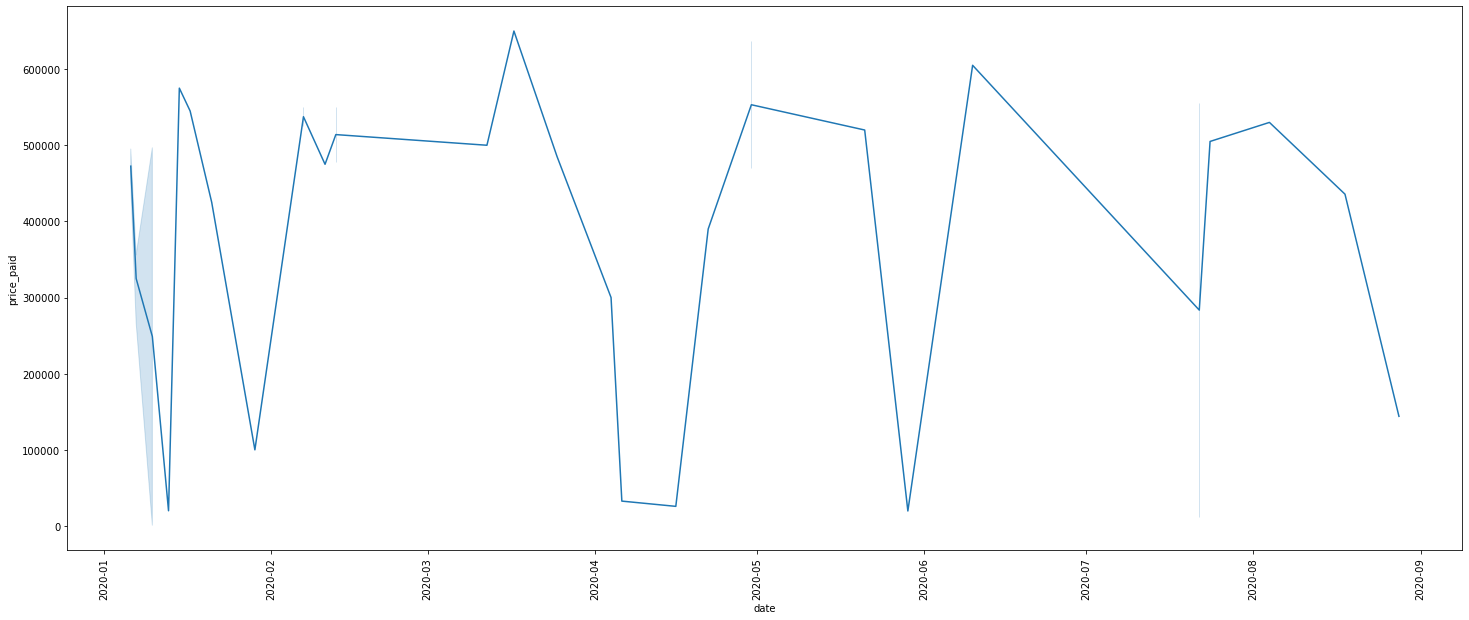

In [83]:
fig, ax = plt.subplots(figsize = (25,10))
ax = sns.lineplot(data=df_pp_gl[(df_pp_gl['price_paid']<6.910000e+05) & (df_pp_gl['district'] == "CITY OF LONDON")], x="date", y="price_paid", ax=ax)
plt.setp(ax.get_xticklabels(), rotation=90)
# sns.lineplot(data=df_gl, x="date", y="parks_percent_change_from_baseline", ax=ax)

In [81]:
df_pp_gl

,ID,price_paid,date,post_code,D,N,F,street_n,unknown,street,locality,city,district,county,A,B,month,week
231,{9FF0D969-D389-11ED-E053-6C04A8C06383},580000,2020-01-14,DA7 5PB,D,N,F,10,NaN,LYDD ROAD,NaN,BEXLEYHEATH,BEXLEY,GREATER LONDON,A,A,1,3
255,{9FF0D969-D3A2-11ED-E053-6C04A8C06383},480000,2020-01-17,BR6 9QX,S,N,F,11,NaN,SHELLEY CLOSE,NaN,ORPINGTON,BROMLEY,GREATER LONDON,A,A,1,3
276,{9FF0D969-D626-11ED-E053-6C04A8C06383},315000,2020-02-14,DA5 3BE,T,N,F,72,NaN,HOWARD AVENUE,NaN,BEXLEY,BEXLEY,GREATER LONDON,B,A,2,7
287,{9FF0D969-D633-11ED-E053-6C04A8C06383},565000,2020-02-10,BR2 8BL,S,N,F,42,NaN,OXHAWTH CRESCENT,NaN,BROMLEY,BROMLEY,GREATER LONDON,A,A,2,7
564,{9FF0D969-D3B9-11ED-E053-6C04A8C06383},454000,2020-01-21,BR6 9BJ,S,N,F,17,NaN,WILMINGTON AVENUE,NaN,ORPINGTON,BROMLEY,GREATER LONDON,A,A,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377001,{9FF0D969-D331-11ED-E053-6C04A8C06383},342000,2020-01-24,DA16 2DA,T,N,F,117,NaN,RADNOR AVENUE,NaN,WELLING,BEXLEY,GREATER LONDON,A,A,1,4
377031,{9FF0D969-D5C0-11ED-E053-6C04A8C06383},328850,2020-02-03,DA15 8PE,S,N,F,924,NaN,EAST ROCHESTER WAY,NaN,SIDCUP,BEXLEY,GREATER LONDON,A,A,2,6
377127,{9FF0D969-D34F-11ED-E053-6C04A8C06383},335000,2020-02-14,DA8 1DU,S,N,F,116,NaN,CARLTON ROAD,NaN,ERITH,BEXLEY,GREATER LONDON,A,A,2,7
377256,{9FF0D969-D372-11ED-E053-6C04A8C06383},480000,2020-02-07,BR3 3JP,S,N,F,23,NaN,CROSSWAYS ROAD,NaN,BECKENHAM,BROMLEY,GREATER LONDON,A,A,2,6
